In [ ]:
#for eda

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# cd [your src path]
%cd /content/drive/MyDrive/bistelligence/BISTelligence/src

/content/drive/MyDrive/bistelligence/BISTelligence/src


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

#import import_ipynb
import data.preprocessing as dp

In [10]:
# data csv file path
path = '/content/drive/MyDrive/bistelligence/BIS_data/BISTelligen_Project_Data.csv'

# get data
data = dp.GetData(path)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key              1764 non-null   int64  
 1   Pressure         1764 non-null   float64
 2   Power1           1764 non-null   float64
 3   Power2           1764 non-null   float64
 4   Vibration_Peak1  1764 non-null   float64
 5   Vibration_RMS1   1764 non-null   float64
 6   Vibration_Peak2  1764 non-null   float64
 7   Vibration_RMS2   1764 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 110.4 KB


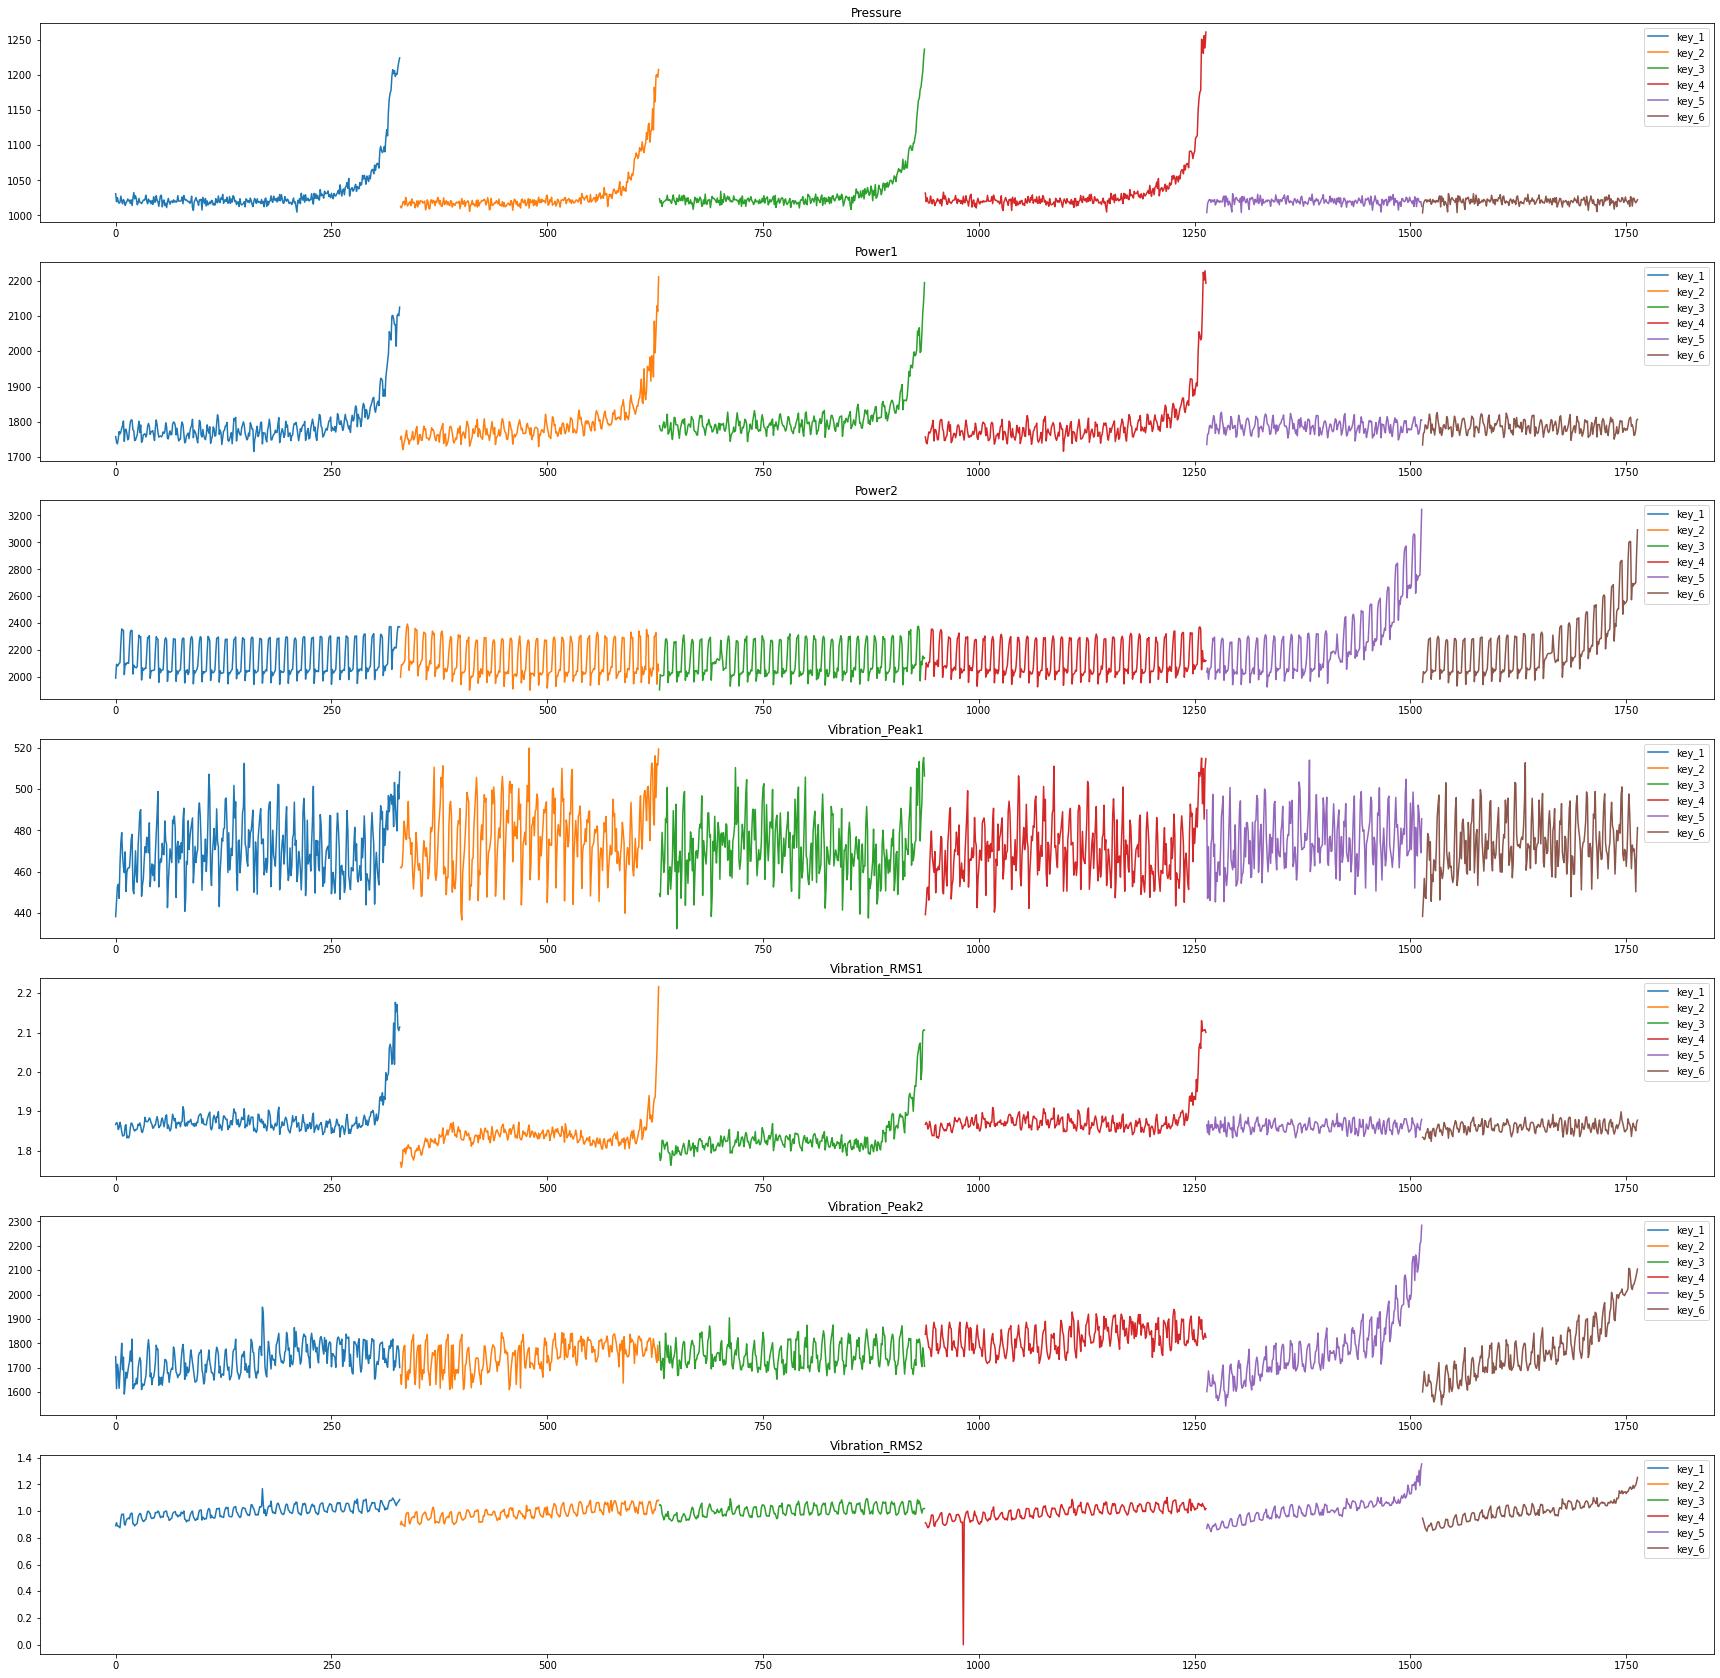

In [40]:
fig= plt.figure(figsize= (30, 30))
a= []
i=0
for y in range(7):
    a.append(fig.add_subplot(7, 1, y+1))

key_legend = ['key_1','key_2','key_3','key_4','key_5','key_6']

for col in data.columns:
    if col=='key':
        continue

    for key_num in data.key.unique():
      a[i].plot(data.loc[data.key==key_num].index, data[col].loc[data.key==key_num],label=key_legend[key_num-1])
    

    title= col
    a[i].set_title(title)
    a[i].legend()
    i+=1

In [42]:
_, imputated_data = dp.GetPreprocessedData(path=path, scaled=False)

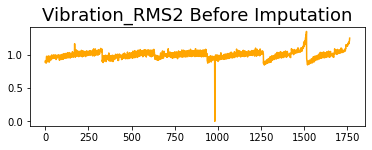

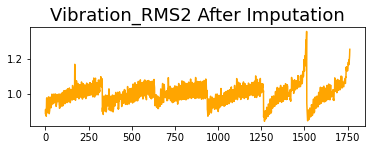

In [45]:
for i in range(2) :
    plt.subplot(2, 1,i+1)
    if i == 0 :
      plt.plot(data['Vibration_RMS2'],color='orange')
      title= ''.join(['Vibration_RMS2', ' Before Imputation'])
    else :
      plt.plot(imputated_data['Vibration_RMS2'],color='orange')
      title= ''.join(['Vibration_RMS2',' After Imputation'])
    plt.title(title,fontdict={'fontsize' : 18})
    plt.show()

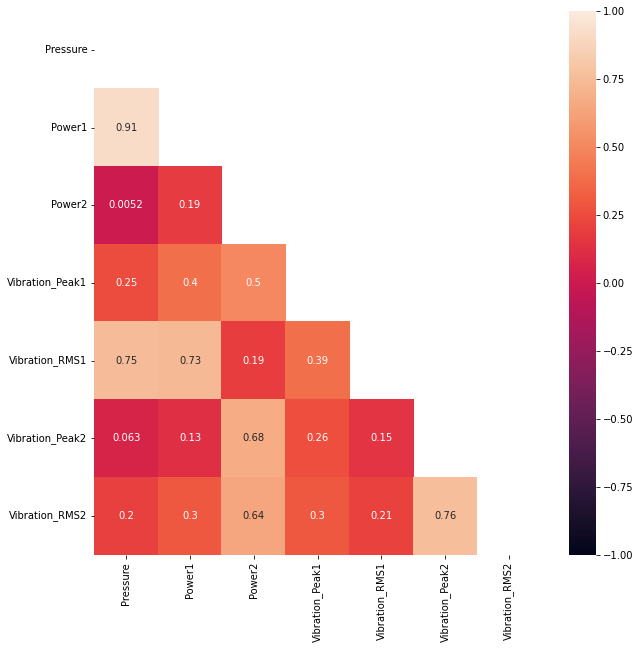

In [46]:
mask=np.zeros_like(imputated_data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(imputated_data.corr(), vmin=-1, vmax=1,annot=True,mask=mask)

In [ ]:
# data scaling 전/후 분포 비교

In [ ]:
# scaled data로 각 feature scatter plot 시각화 -> normal 범주 선정 시각화(colored)

In [ ]:
# key별로 pca / tsne 진행